<div style="
    padding: 20px;
    color: white;
    margin: 0;
    font-size: 300%;
    font-weight: 800;
    text-align: center;
    display: fill;
    border-radius: 60px;
    background-color: #D8CEF6;
    box-shadow: 0 4px 8px rgba(0, 0, 0, 0.2);
    text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5);
">
    Pancreatic Cancer Prediction<br>
    (ML / DL)
</div>

# <div style="display: inline-block; padding: 20px 20px; border-radius: 15px; background: linear-gradient(135deg, #d8bfd8, #8b008b); box-shadow: 3px 3px 8px rgba(0, 0, 0, 0.2); font-size: 35px; font-family: Arial, sans-serif; color: #ffffff; text-align: center;">Import Libraries & Read Dataset</div>

In [1]:
# For EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, RobustScaler

# For Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression, BayesianRidge
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.exceptions import FitFailedWarning

# For Deep Learning
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

In [2]:
df = pd.read_csv('/kaggle/input/pancreatic-cancer-prediction-dataset/pancreatic_cancer_prediction_sample.csv')
df.head()

,Country,Age,Gender,Smoking_History,Obesity,Diabetes,Chronic_Pancreatitis,Family_History,Hereditary_Condition,Jaundice,...,Stage_at_Diagnosis,Survival_Time_Months,Treatment_Type,Survival_Status,Alcohol_Consumption,Physical_Activity_Level,Diet_Processed_Food,Access_to_Healthcare,Urban_vs_Rural,Economic_Status
0,Canada,64,Female,0,0,0,0,0,0,0,...,Stage III,13,Surgery,0,0,Medium,Low,High,Urban,Low
1,South Africa,77,Male,1,1,0,0,0,0,0,...,Stage III,13,Chemotherapy,0,1,Medium,Medium,Medium,Urban,Low
2,India,71,Female,0,0,0,0,0,0,0,...,Stage IV,3,Chemotherapy,1,0,Medium,High,Low,Rural,Middle
3,Germany,56,Male,0,0,0,0,1,0,1,...,Stage IV,6,Radiation,0,1,Low,Low,Medium,Rural,Middle
4,United States,82,Female,0,0,0,0,1,0,0,...,Stage IV,9,Chemotherapy,1,0,Low,Medium,Medium,Rural,Low


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,50000.0,64.54094,9.973847,30.0,58.0,65.0,71.0,90.0
Smoking_History,50000.0,0.29954,0.458061,0.0,0.0,0.0,1.0,1.0
Obesity,50000.0,0.24826,0.432008,0.0,0.0,0.0,0.0,1.0
Diabetes,50000.0,0.19998,0.399989,0.0,0.0,0.0,0.0,1.0
Chronic_Pancreatitis,50000.0,0.09930,0.299067,0.0,0.0,0.0,0.0,1.0
Family_History,50000.0,0.15168,0.358714,0.0,0.0,0.0,0.0,1.0
Hereditary_Condition,50000.0,0.04944,0.216787,0.0,0.0,0.0,0.0,1.0
Jaundice,50000.0,0.19922,0.399418,0.0,0.0,0.0,0.0,1.0
Abdominal_Discomfort,50000.0,0.29650,0.456719,0.0,0.0,0.0,1.0,1.0
Back_Pain,50000.0,0.25286,0.434656,0.0,0.0,0.0,1.0,1.0


In [4]:
df.describe(include='object').T

,count,unique,top,freq
Country,50000,9,United States,17608
Gender,50000,2,Male,25962
Stage_at_Diagnosis,50000,4,Stage IV,19922
Treatment_Type,50000,3,Chemotherapy,24910
Physical_Activity_Level,50000,3,Medium,20038
Diet_Processed_Food,50000,3,Medium,20122
Access_to_Healthcare,50000,3,Medium,25268
Urban_vs_Rural,50000,2,Urban,35003
Economic_Status,50000,3,Middle,24881


# <div style="display: inline-block; padding: 20px 20px; border-radius: 15px; background: linear-gradient(135deg, #d8bfd8, #8b008b); box-shadow: 3px 3px 8px rgba(0, 0, 0, 0.2); font-size: 35px; font-family: Arial, sans-serif; color: #ffffff; text-align: center;">Data preprocessing</div>

In [5]:
print('Missing Value (%)')
print(df.isna().mean()*100)
print('\nDuplicate Row (%)')
print(df.duplicated().mean())

Missing Value (%)
Country                          0.0
Age                              0.0
Gender                           0.0
Smoking_History                  0.0
Obesity                          0.0
Diabetes                         0.0
Chronic_Pancreatitis             0.0
Family_History                   0.0
Hereditary_Condition             0.0
Jaundice                         0.0
Abdominal_Discomfort             0.0
Back_Pain                        0.0
Weight_Loss                      0.0
Development_of_Type2_Diabetes    0.0
Stage_at_Diagnosis               0.0
Survival_Time_Months             0.0
Treatment_Type                   0.0
Survival_Status                  0.0
Alcohol_Consumption              0.0
Physical_Activity_Level          0.0
Diet_Processed_Food              0.0
Access_to_Healthcare             0.0
Urban_vs_Rural                   0.0
Economic_Status                  0.0
dtype: float64

Duplicate Row (%)
8e-05


In [6]:
print('\nDuplicate Row (%)')
df.drop_duplicates(inplace=True)
print(df.duplicated().mean())


Duplicate Row (%)
0.0


# <div style="display: inline-block; padding: 20px 20px; border-radius: 15px; background: linear-gradient(135deg, #d8bfd8, #8b008b); box-shadow: 3px 3px 8px rgba(0, 0, 0, 0.2); font-size: 35px; font-family: Arial, sans-serif; color: #ffffff; text-align: center;">EDA : Correlation Analysis</div>

In [7]:
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

original_objects_cols = list(label_encoders.keys())
num_col = df.select_dtypes(include=['int64','float64']).columns

num_col_scale = [col for col in num_col if col not in original_objects_cols and col != 'Survival_Status']

scaler = StandardScaler()
df[num_col_scale] = scaler.fit_transform(df[num_col_scale])

df[num_col_scale].head()

,Age,Smoking_History,Obesity,Diabetes,Chronic_Pancreatitis,Family_History,Hereditary_Condition,Jaundice,Abdominal_Discomfort,Back_Pain,Weight_Loss,Development_of_Type2_Diabetes,Survival_Time_Months,Alcohol_Consumption
0,-0.054237,-0.653974,-0.574702,-0.499994,-0.332013,-0.422868,-0.22807,-0.498806,-0.649208,-0.581754,-0.733748,-0.494111,-0.079736,-0.660089
1,1.249154,1.529113,1.740032,-0.499994,-0.332013,-0.422868,-0.22807,-0.498806,-0.649208,-0.581754,-0.733748,2.023836,-0.079736,1.514947
2,0.647588,-0.653974,-0.574702,-0.499994,-0.332013,-0.422868,-0.22807,-0.498806,-0.649208,-0.581754,1.362866,2.023836,-0.966878,-0.660089
3,-0.856324,-0.653974,-0.574702,-0.499994,-0.332013,2.364804,-0.22807,2.004788,-0.649208,-0.581754,-0.733748,2.023836,-0.700735,1.514947
4,1.750458,-0.653974,-0.574702,-0.499994,-0.332013,2.364804,-0.22807,-0.498806,-0.649208,-0.581754,-0.733748,-0.494111,-0.434592,-0.660089


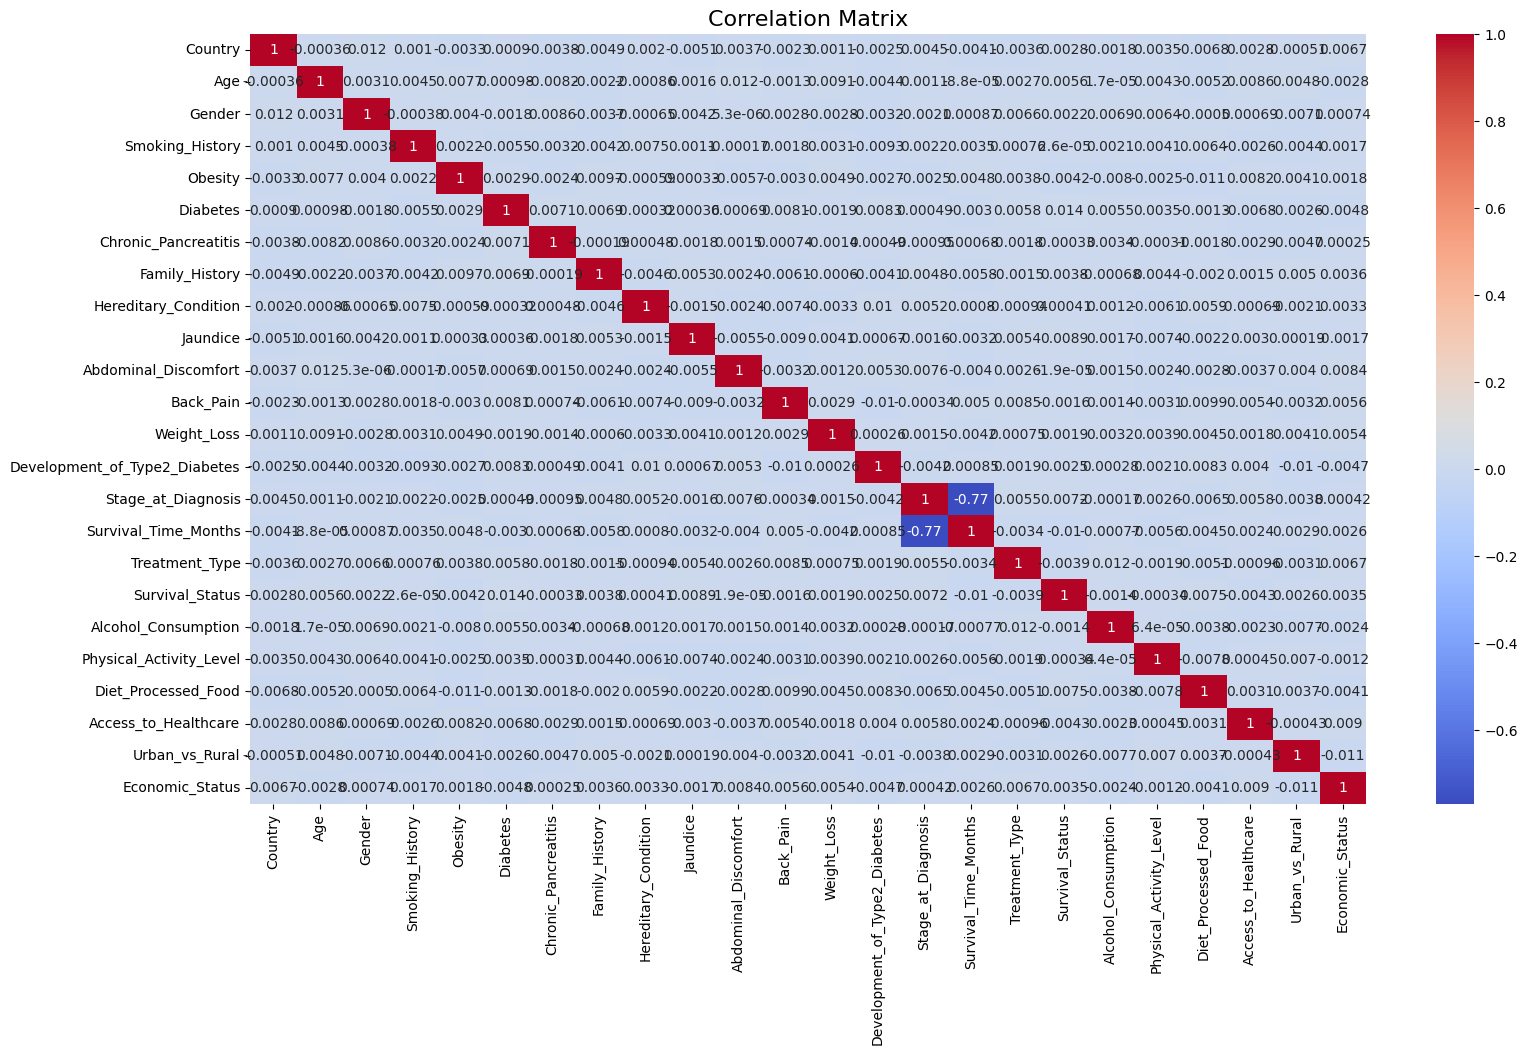

In [8]:
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

correlation_matrix = df.corr(method='pearson')

plt.figure(figsize=(18, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix", fontsize=16)
plt.show()

# <div style="display: inline-block; padding: 20px 20px; border-radius: 15px; background: linear-gradient(135deg, #d8bfd8, #8b008b); box-shadow: 3px 3px 8px rgba(0, 0, 0, 0.2); font-size: 35px; font-family: Arial, sans-serif; color: #ffffff; text-align: center;">Comparison of Machine Learning Model Performance</div>

In [9]:
X = df.drop('Survival_Status', axis=1)
y = df['Survival_Status'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Logistic Regression": LogisticRegression(max_iter=10000, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=3),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=100, random_state=42)
}

def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)  
    y_pred = model.predict(X_test)  
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    
    return accuracy, precision, recall, f1

In [10]:
results = []

for name, model in models.items():
    accuracy, precision, recall, f1 = evaluate_model(model, X_train, X_test, y_train, y_test)
    results.append({
        "Model": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1
    })

results_df = pd.DataFrame(results)
results_df

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.8715,0.759512,0.8715,0.811662
1,KNN,0.8386,0.777171,0.8386,0.803516
2,Decision Tree,0.7487,0.774614,0.7487,0.761095
3,Random Forest,0.8715,0.759512,0.8715,0.811662
4,XGBoost,0.8708,0.789282,0.8708,0.811888


# <div style="display: inline-block; padding: 20px 20px; border-radius: 15px; background: linear-gradient(135deg, #d8bfd8, #8b008b); box-shadow: 3px 3px 8px rgba(0, 0, 0, 0.2); font-size: 35px; font-family: Arial, sans-serif; color: #ffffff; text-align: center;">Comparison of Deep Learning Model Performance</div>

In [11]:
def plot_history(history, main_title):
    plt.figure(figsize=(12, 5))

    plt.suptitle(main_title, fontsize=20, fontweight='bold')

    plt.subplot(1, 2, 1)
    plt.plot(history['accuracy'], label='Training Accuracy')
    plt.plot(history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy', fontsize=16)
    plt.xlabel('Epoch', fontsize=12)
    plt.ylabel('Accuracy', fontsize=12)
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history['loss'], label='Training Loss')
    plt.plot(history['val_loss'], label='Validation Loss')
    plt.title('Loss', fontsize=16)
    plt.xlabel('Epoch', fontsize=12)
    plt.ylabel('Loss', fontsize=12)
    plt.legend()

    plt.tight_layout(rect=[0, 0, 1, 0.92]) 
    plt.show()

early_stopping = EarlyStopping(
    monitor='val_loss',  
    patience=10,           
    restore_best_weights=True  
)

In [12]:
# NN Model 
simple_nn = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)), 
    Dense(32, activation='relu'),  
    Dense(1, activation='sigmoid')  
])

simple_nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
simple_nn.summary()

history = simple_nn.fit(
    X_train, y_train,
    epochs=50,
    batch_size=16,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping]
)

test_loss, test_accuracy = simple_nn.evaluate(X_test, y_test, verbose=0)

print(f"Test Accuracy: {test_accuracy:.4f}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │           1,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,649 (14.25 KB)

 Trainable params: 3,649 (14.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8534 - loss: 0.4120 - val_accuracy: 0.8715 - val_loss: 0.3875
Epoch 2/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8712 - loss: 0.3866 - val_accuracy: 0.8715 - val_loss: 0.3870
Epoch 3/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8721 - loss: 0.3831 - val_accuracy: 0.8715 - val_loss: 0.3875
Epoch 4/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8681 - loss: 0.3886 - val_accuracy: 0.8715 - val_loss: 0.3876
Epoch 5/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8713 - loss: 0.3817 - val_accuracy: 0.8715 - val_loss: 0.3900
Epoch 6/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8735 - loss: 0.3753 - val_accuracy: 0.8715 - val_loss: 0.3877
Epoch 7/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8724 - loss: 0.3764 - val_accuracy: 0.8715 - val_loss: 0.3890
Epoch 8/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8719 - loss: 0.3766 - 

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Accuracy: 0.8715


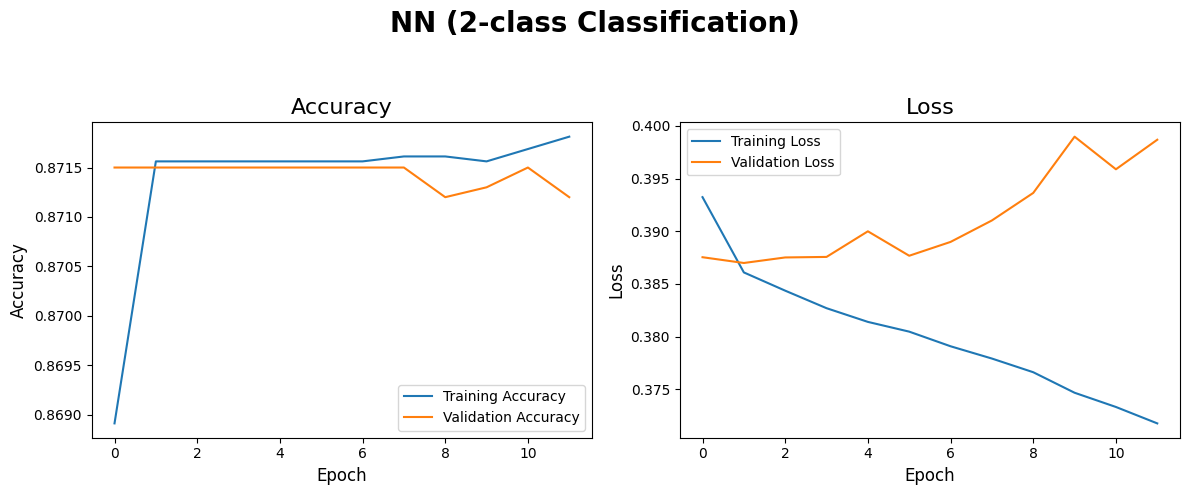

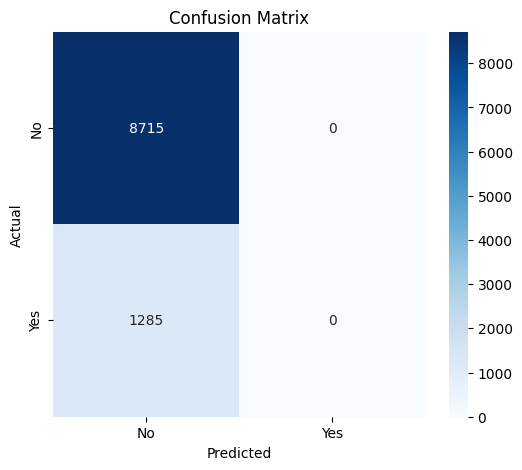

In [13]:
y_pred = simple_nn.predict(X_test)

y_pred_classes = (y_pred > 0.5).astype(int)  

accuracy = accuracy_score(y_test, y_pred_classes)
print(f"Accuracy: {accuracy:.4f}")

plot_history(history.history, "NN (2-class Classification)")

cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No', 'Yes'],  
            yticklabels=['No', 'Yes'])  

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [14]:
# DNN Model 
dnn_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.4),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

dnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
dnn_model.summary()

history = dnn_model.fit(
    X_train, y_train,  
    epochs=50,
    batch_size=16,
    validation_data=(X_test, y_test),  
    callbacks=[early_stopping]
)

test_loss, test_accuracy = dnn_model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 128)                 │           3,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,209 (55.50 KB)

 Trainable params: 13,825 (54.00 KB)

 Non-trainable params: 384 (1.50 KB)

Epoch 1/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8571 - loss: 0.4255 - val_accuracy: 0.8715 - val_loss: 0.3933
Epoch 2/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8733 - loss: 0.3871 - val_accuracy: 0.8715 - val_loss: 0.3888
Epoch 3/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8742 - loss: 0.3838 - val_accuracy: 0.8715 - val_loss: 0.3858
Epoch 4/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8749 - loss: 0.3805 - val_accuracy: 0.8715 - val_loss: 0.3853
Epoch 5/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8723 - loss: 0.3848 - val_accuracy: 0.8715 - val_loss: 0.3855
Epoch 6/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8713 - loss: 0.3860 - val_accuracy: 0.8715 - val_loss: 0.3879
Epoch 7/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8749 - loss: 0.3784 - val_accuracy: 0.8715 - val_loss: 0.3847
Epoch 8/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8722 - loss: 0.3834 -

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Accuracy: 0.8715


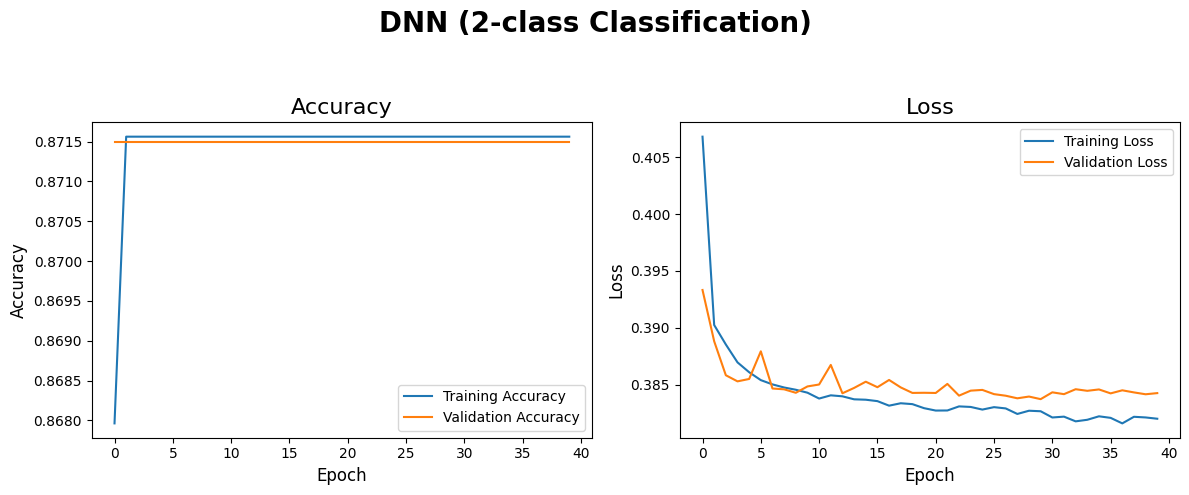

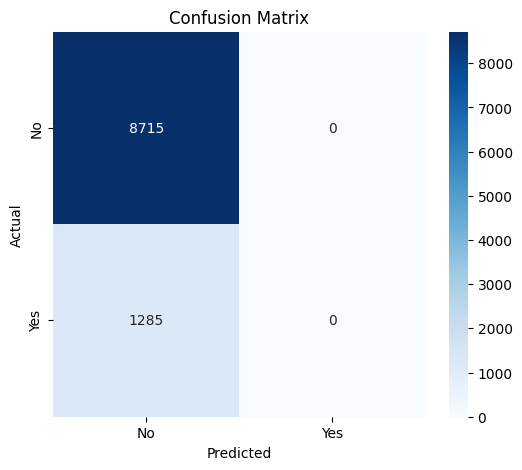

In [15]:
y_pred = dnn_model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)   

accuracy = accuracy_score(y_test, y_pred_classes)
print(f"Accuracy: {accuracy:.4f}")

plot_history(history.history, "DNN (2-class Classification)")

cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No', 'Yes'],  
            yticklabels=['No', 'Yes'])  

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [16]:
# ANN Model
ann_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),  
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  
])

ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
ann_model.summary()

history = ann_model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=16,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping]
)

test_loss, test_accuracy = ann_model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                      │ (None, 128)                 │           3,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,393 (44.50 KB)

 Trainable params: 11,393 (44.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8664 - loss: 0.4123 - val_accuracy: 0.8715 - val_loss: 0.3865
Epoch 2/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8713 - loss: 0.3917 - val_accuracy: 0.8715 - val_loss: 0.3854
Epoch 3/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8743 - loss: 0.3825 - val_accuracy: 0.8715 - val_loss: 0.3854
Epoch 4/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8718 - loss: 0.3867 - val_accuracy: 0.8715 - val_loss: 0.3854
Epoch 5/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8700 - loss: 0.3884 - val_accuracy: 0.8715 - val_loss: 0.3857
Epoch 6/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8696 - loss: 0.3878 - val_accuracy: 0.8715 - val_loss: 0.3850
Epoch 7/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8699 - loss: 0.3865 - val_accuracy: 0.8715 - val_loss: 0.3851
Epoch 8/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8709 - loss: 0.3837 - 

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Accuracy: 0.8715


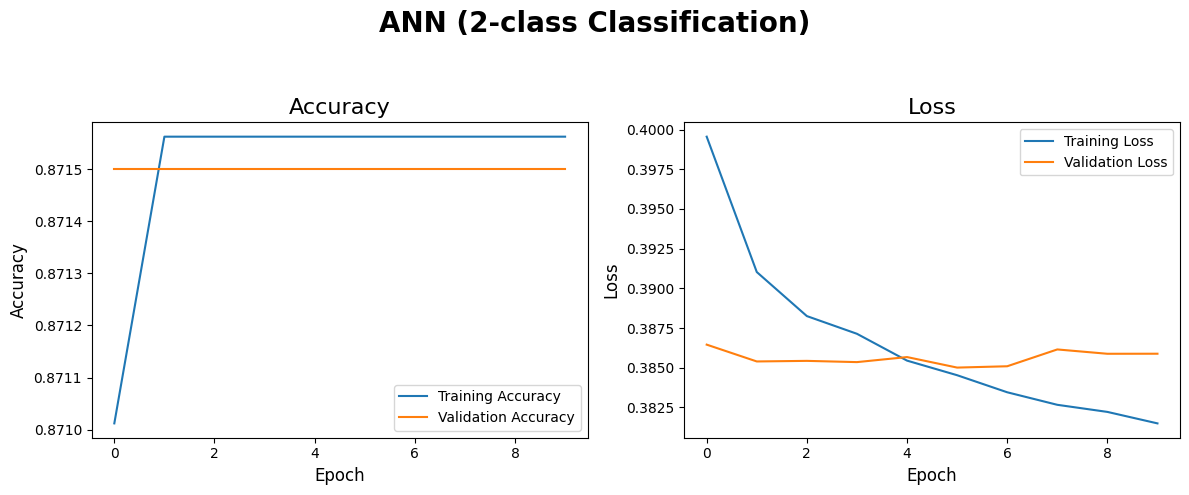

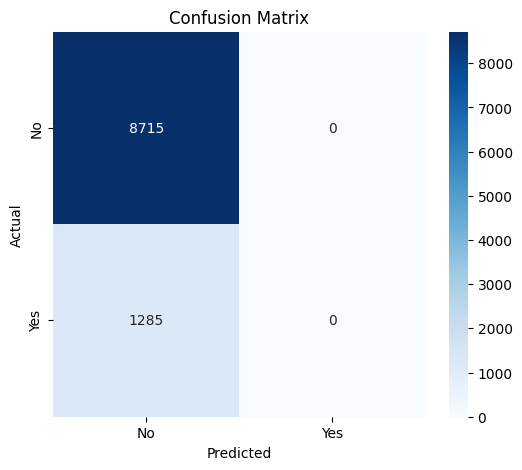

In [17]:
y_pred = ann_model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)  

accuracy = accuracy_score(y_test, y_pred_classes)
print(f"Accuracy: {accuracy:.4f}")

plot_history(history.history, "ANN (2-class Classification)")

cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No', 'Yes'],  
            yticklabels=['No', 'Yes'])  

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [18]:
# MLP Model (ReLU → sigmoid)
mlp_model = Sequential([
    Dense(128, activation='sigmoid', input_shape=(X_train.shape[1],)),  
    Dropout(0.3),
    Dense(64, activation='sigmoid'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

mlp_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
mlp_model.summary()

history = mlp_model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=16,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping]
)

test_loss, test_accuracy = mlp_model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                     │ (None, 128)                 │           3,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,393 (44.50 KB)

 Trainable params: 11,393 (44.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8645 - loss: 0.3983 - val_accuracy: 0.8715 - val_loss: 0.3839
Epoch 2/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8691 - loss: 0.3918 - val_accuracy: 0.8715 - val_loss: 0.3836
Epoch 3/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8724 - loss: 0.3862 - val_accuracy: 0.8715 - val_loss: 0.3836
Epoch 4/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8724 - loss: 0.3851 - val_accuracy: 0.8715 - val_loss: 0.3840
Epoch 5/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8714 - loss: 0.3864 - val_accuracy: 0.8715 - val_loss: 0.3839
Epoch 6/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8686 - loss: 0.3918 - val_accuracy: 0.8715 - val_loss: 0.3838
Epoch 7/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8681 - loss: 0.3924 - val_accuracy: 0.8715 - val_loss: 0.3848
Epoch 8/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8742 - loss: 0.3801 - 

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Accuracy: 0.8715


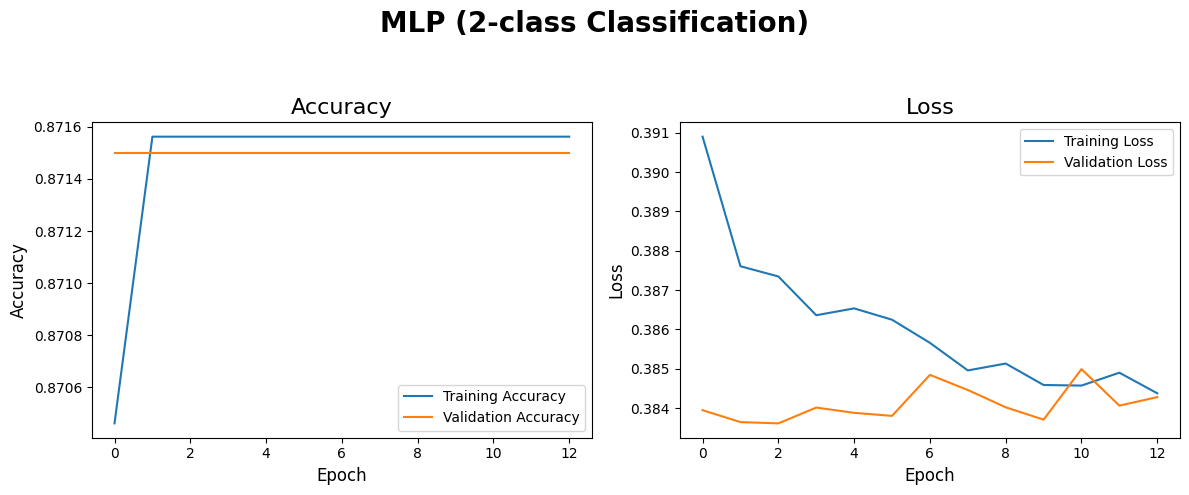

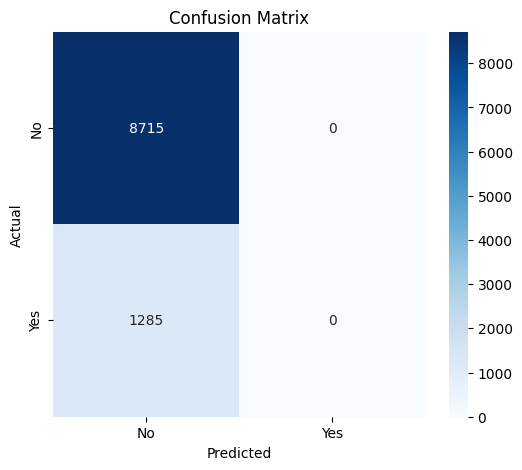

In [19]:
y_pred = mlp_model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)   

accuracy = accuracy_score(y_test, y_pred_classes)
print(f"Accuracy: {accuracy:.4f}")

plot_history(history.history, "MLP (2-class Classification)")

cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No', 'Yes'],  
            yticklabels=['No', 'Yes'])  

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [20]:
X_train_np = X_train.values
X_test_np = X_test.values

X_train_reshaped = X_train_np.reshape((X_train_np.shape[0], X_train_np.shape[1], 1))  
X_test_reshaped = X_test_np.reshape((X_test_np.shape[0], X_test_np.shape[1], 1))

# CNN Model
cnn_model = Sequential([
    Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])),
    MaxPooling1D(pool_size=1, strides=1),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  
])

cnn_model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

cnn_model.summary()

history = cnn_model.fit(
    X_train_reshaped, y_train,  
    epochs=50,
    batch_size=16,
    validation_data=(X_test_reshaped, y_test),  
    callbacks=[early_stopping]
)

test_loss, test_accuracy = cnn_model.evaluate(X_test_reshaped, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 21, 32)              │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 21, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 672)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 64)                  │          43,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 43,265 (169.00 KB)

 Trainable params: 43,265 (169.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8706 - loss: 0.3896 - val_accuracy: 0.8715 - val_loss: 0.3881
Epoch 2/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8714 - loss: 0.3857 - val_accuracy: 0.8715 - val_loss: 0.3945
Epoch 3/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8695 - loss: 0.3898 - val_accuracy: 0.8715 - val_loss: 0.3852
Epoch 4/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8709 - loss: 0.3862 - val_accuracy: 0.8715 - val_loss: 0.3852
Epoch 5/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8704 - loss: 0.3860 - val_accuracy: 0.8715 - val_loss: 0.3882
Epoch 6/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8711 - loss: 0.3849 - val_accuracy: 0.8715 - val_loss: 0.3859
Epoch 7/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8723 - loss: 0.3814 - val_accuracy: 0.8715 - val_loss: 0.3873
Epoch 8/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8702 - loss: 0.3855 - 

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Accuracy: 0.8715


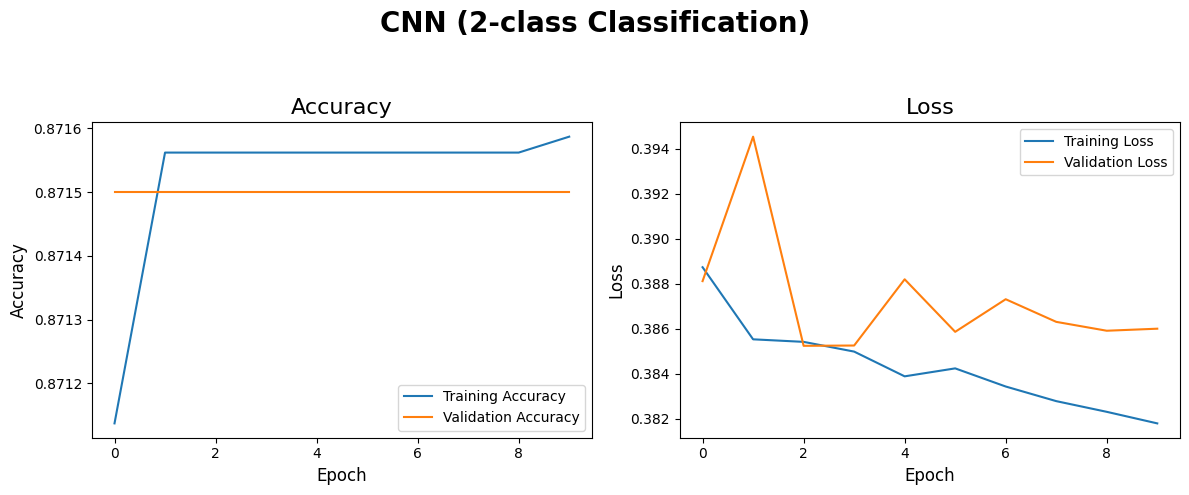

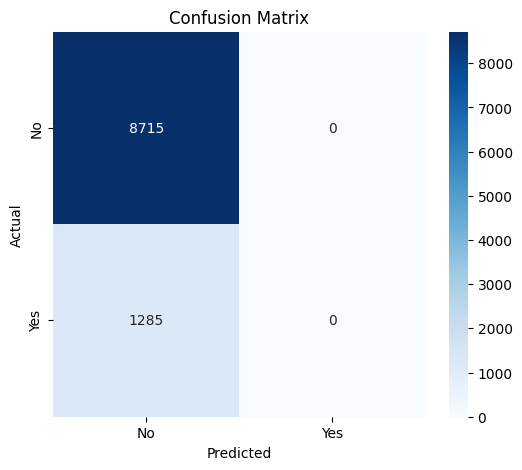

In [21]:
y_pred = cnn_model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)  

accuracy = accuracy_score(y_test, y_pred_classes)
print(f"Accuracy: {accuracy:.4f}")

plot_history(history.history, "CNN (2-class Classification)")

cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No', 'Yes'],  
            yticklabels=['No', 'Yes'])  

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [22]:
def evaluate_model_on_test(model, X_test, y_test):
    if len(X_test.shape) == 2:  
        X_test_input = X_test
    else: 
        X_test_input = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

    y_pred_prob = model.predict(X_test_input, verbose=0)

    y_pred = (y_pred_prob > 0.5).astype(int) 

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    return accuracy, precision, recall, f1

results_deep = []

models_dict = {
    "Simple NN": simple_nn,
    "DNN" : dnn_model,
    "ANN" : ann_model,
    "MLP": mlp_model,
    "CNN": cnn_model,
}

for model_name, model in models_dict.items():
    acc, precision, recall, f1 = evaluate_model_on_test(model, X_test, y_test)
    
    results_deep.append({
        "Model": model_name,
        "Accuracy": acc,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1
    })


results_df2 = pd.DataFrame(results_deep)
results_df2

,Model,Accuracy,Precision,Recall,F1-Score
0,Simple NN,0.8715,0.759512,0.8715,0.811662
1,DNN,0.8715,0.759512,0.8715,0.811662
2,ANN,0.8715,0.759512,0.8715,0.811662
3,MLP,0.8715,0.759512,0.8715,0.811662
4,CNN,0.8715,0.759512,0.8715,0.811662


# <div style="display: inline-block; padding: 20px 20px; border-radius: 15px; background: linear-gradient(135deg, #d8bfd8, #8b008b); box-shadow: 3px 3px 8px rgba(0, 0, 0, 0.2); font-size: 35px; font-family: Arial, sans-serif; color: #ffffff; text-align: center;">Conclusion</div>


Best Model (Machine Learning):
Model        Logistic Regression
Accuracy                  0.8715
Precision               0.759512
Recall                    0.8715
F1-Score                0.811662
Name: 0, dtype: object


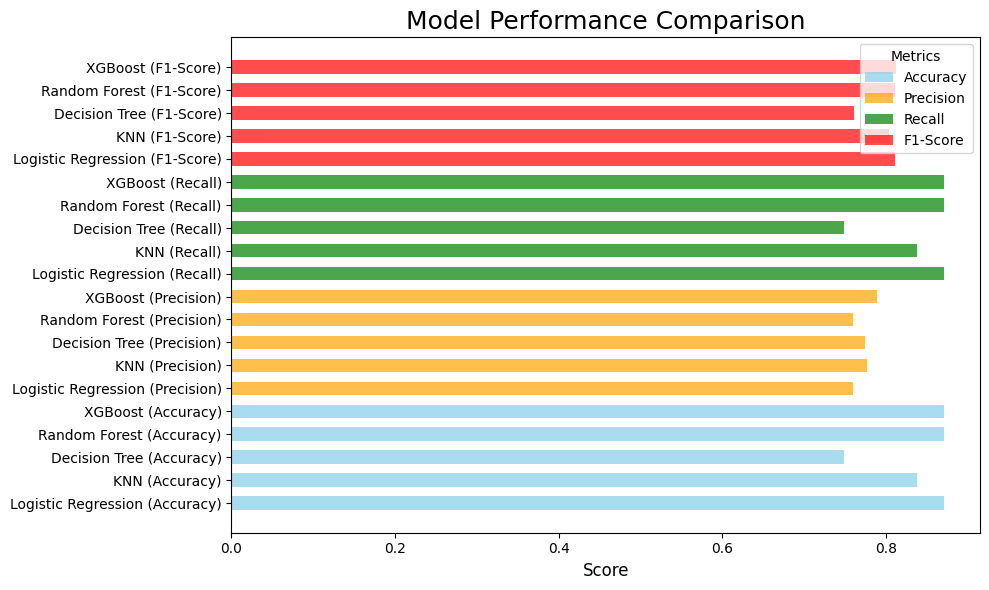


Optimal Model based on Accuracy: Logistic Regression with Accuracy = 0.8715


In [23]:
best_model = results_df.loc[results_df['Accuracy'].idxmax()]
print("\nBest Model (Machine Learning):")
print(best_model)

metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]
colors = ["skyblue", "orange", "green", "red"]

fig, ax = plt.subplots(figsize=(10, 6))

offset = 0.3

for i, metric in enumerate(metrics):
    ax.barh(results_df['Model'] + f" ({metric})", results_df[metric], color=colors[i], alpha=0.7, label=metric, height=0.6)

ax.set_xlabel("Score", fontsize=12)
ax.set_title("Model Performance Comparison", fontsize=18)
ax.legend(title="Metrics")

plt.tight_layout()
plt.show()

print(f"\nOptimal Model based on Accuracy: {best_model['Model']} with Accuracy = {best_model['Accuracy']:.4f}")


Best Model (Deep Learning):
Model        Simple NN
Accuracy        0.8715
Precision     0.759512
Recall          0.8715
F1-Score      0.811662
Name: 0, dtype: object


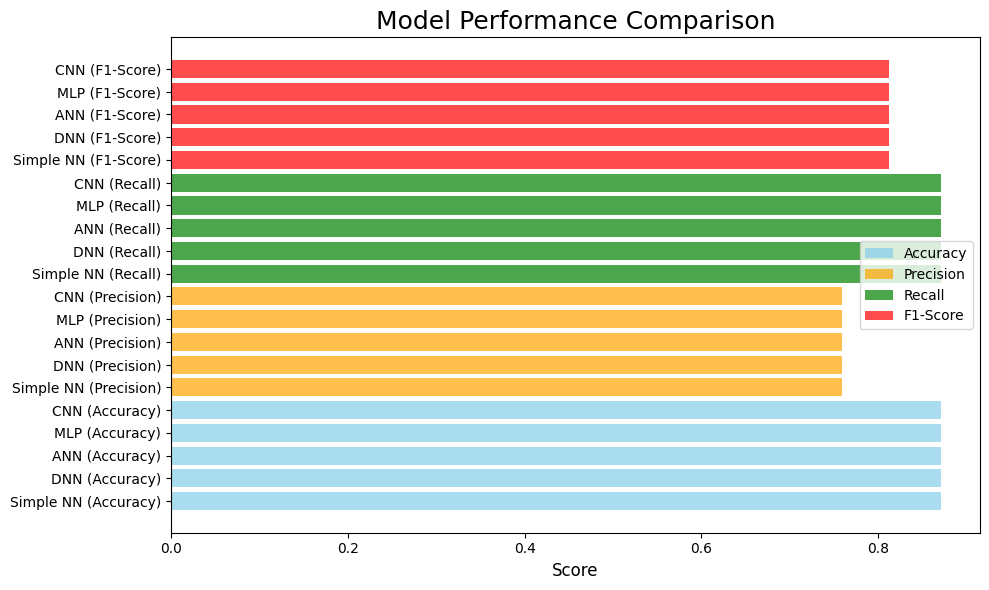


Optimal Model based on Accuracy: Simple NN with Accuracy = 0.8715


In [24]:
best_model2 = results_df2.loc[results_df['Accuracy'].idxmax()]
print("\nBest Model (Deep Learning):")
print(best_model2)

metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]
colors = ["skyblue", "orange", "green", "red"]

fig, ax = plt.subplots(figsize=(10, 6))

for i, metric in enumerate(metrics):
    ax.barh(results_df2['Model'] + f" ({metric})", results_df2[metric], color=colors[i], alpha=0.7, label=metric)

ax.set_xlabel("Score", fontsize=12)
ax.set_title("Model Performance Comparison", fontsize=18)
ax.legend()
plt.tight_layout()
plt.show()

print(f"\nOptimal Model based on Accuracy: {best_model2['Model']} with Accuracy = {best_model2['Accuracy']:.4f}")

<div style="display: inline-block; padding: 10px 15px; border-radius: 20px; background: linear-gradient(135deg, #ff7f50, #ff1493); box-shadow: 5px 5px 15px rgba(0, 0, 0, 0.3); font-size: 30px; font-family: 'Helvetica Neue', Arial, sans-serif; color: #ffffff; text-align: center; border: 2px solid #ffffff;">Thanks !</div><br><br>

<h3> If you have any questions, please feel free to ask me a question and use the code freely ! </h3><br>

<div style="text-align: center;">
    <a href="https://www.kaggle.com/lko9911" target="_blank" style="display: inline-block; background-color: #3a86ff; color: #fff; text-decoration: none; padding: 5px 10px; border-radius: 10px; margin: 15px; font-size: 25px;">Kaggle</a>
    <a href="https://github.com/lko9911" target="_blank" style="display: inline-block; background-color: #ff8c00; color: #ffffff; text-decoration: none; padding: 5px 20px; border-radius: 15px; margin: 15px; border: 2px solid #ff4500; font-size: 25px; font-family: 'Arial', sans-serif; font-weight: bold; transition: all 0.3s ease;">GitHub</a></div>